In [2]:
from pathlib import Path
from typing import Set, Generator
from barnetLSOA import barnetLsoaPath
import pandas as pd
import sqlite3
from imd2SQL import dbPath
import matplotlib.pyplot as plt
import seaborn as sns

def crime_uk_per_month_dir() -> Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    crimeCSV = dc2.joinpath("data/unzipped/crimeCSV")
    return crimeCSV


def listFilesInDirectory(directory: Path) -> Generator:
    return directory.glob("*")


def loadBarnetLSOA():
    col = pd.read_csv(barnetLsoaPath())["LSOA code"]
    return col


def get_ranking_IMD_by_LSOA(year: int):
    db = sqlite3.connect(dbPath())
    if year == 2015:
        query = """
        SELECT *
        FROM IOD_feature_code_rank_15
        """
    elif year == 2019:
        query = """
        SELECT "a. Index of Multiple Deprivation (IMD)","LSOA Code"
        FROM IOD_feature_code_rank_19
        """
    else:
        print("INPUT YEAR INVALID")
        return 0
    df = pd.read_sql(query, db)
    return df #.set_index("LSOA Code")


In [3]:

# THIS CODE DOESNT WORK, check the filtering that is done, if that isnt the problem, take a look at the LSOA codes
lsoaSet = loadBarnetLSOA()
big_imd_by_lsoa_15 = get_ranking_IMD_by_LSOA(2015)
print(big_imd_by_lsoa_15.head())
# imd_by_lsoa_15 = big_imd_by_lsoa_15["a. Index of Multiple Deprivation (IMD)"]
print(len(f"len before: {big_imd_by_lsoa_15.info()})"))
barnetIMD = big_imd_by_lsoa_15.loc[big_imd_by_lsoa_15["LSOA Code"].isin(lsoaSet)]
print(barnetIMD.info())
print(barnetIMD.describe())



   LSOA Code  a. Index of Multiple Deprivation (IMD)  \
0  E01019971                                 17481.0   
1  E01019963                                 31036.0   
2  E01019980                                 11206.0   
3  E01019950                                 15251.0   
4  E01019952                                 26866.0   

   b. Income Deprivation Domain  c. Employment Deprivation Domain  \
0                       17859.0                           20236.0   
1                       26560.0                           27472.0   
2                        9710.0                           12528.0   
3                       11198.0                            8864.0   
4                       22222.0                           21059.0   

   d. Education, Skills and Training Domain  \
0                                   15297.0   
1                                   29016.0   
2                                    8304.0   
3                                   12141.0   
4            

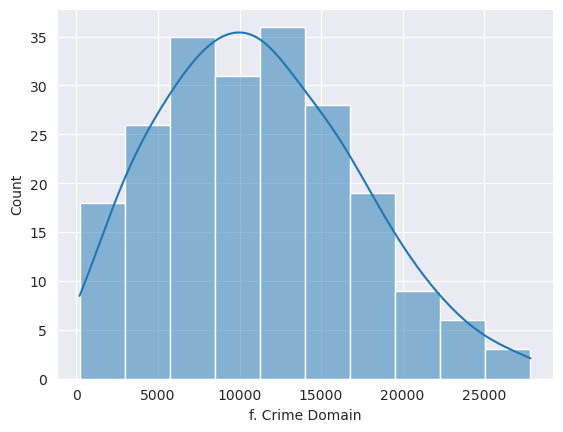

In [4]:
sns.histplot(barnetIMD.reset_index(drop=True)["f. Crime Domain"], kde=True);

In [5]:
mean = barnetIMD["f. Crime Domain"].mean()

In [6]:
std = barnetIMD["f. Crime Domain"].std()

In [11]:
lower = round(mean - std)
upper = round(mean + std)
tup = (lower, upper)
range(tup[0], tup[1])

range(5219, 17194)

In [8]:
filtered = big_imd_by_lsoa_15[big_imd_by_lsoa_15["f. Crime Domain"].isin(range(lower,upper))]

In [9]:
filtered.head()

,LSOA Code,a. Index of Multiple Deprivation (IMD),b. Income Deprivation Domain,c. Employment Deprivation Domain,"d. Education, Skills and Training Domain",e. Health Deprivation and Disability Domain,f. Crime Domain,g. Barriers to Housing and Services Domain,h. Living Environment Deprivation Domain,i. Income Deprivation Affecting Children Index (IDACI),j. Income Deprivation Affecting Older People Index (IDAOPI)
0,E01019971,17481.0,17859.0,20236.0,15297.0,20968.0,9994.0,11262.0,11522.0,11014.0,16495.0
5,E01019982,14042.0,12911.0,15250.0,13930.0,20207.0,15178.0,7022.0,9038.0,8615.0,19957.0
10,E01019863,4756.0,4585.0,2699.0,3456.0,4133.0,9744.0,23326.0,19971.0,6111.0,8962.0
29,E01016305,22538.0,20565.0,26477.0,19037.0,29127.0,11116.0,9858.0,19513.0,19073.0,16999.0
41,E01014732,13495.0,16312.0,13564.0,19893.0,13705.0,11411.0,21376.0,1968.0,20114.0,13561.0


In [13]:
pd.concat([filtered["LSOA Code"],big_imd_by_lsoa_15["LSOA Code"]])

0        E01019971
5        E01019982
10       E01019863
29       E01016305
41       E01014732
           ...    
32839    E01029799
32840    E01013422
32841    E01013427
32842    E01013389
32843    E01022711
Name: LSOA Code, Length: 44819, dtype: object